In [4]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context ("poster")
%matplotlib inline
## ### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
##### For Building the Model #amen
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.pipeline import make_pipeline
##### For Validation of the Model *****
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.model_selection import cross_val_score

In [6]:
df=pd.read_csv("/content/Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## **EDA**

In [7]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Sales vs Radio')

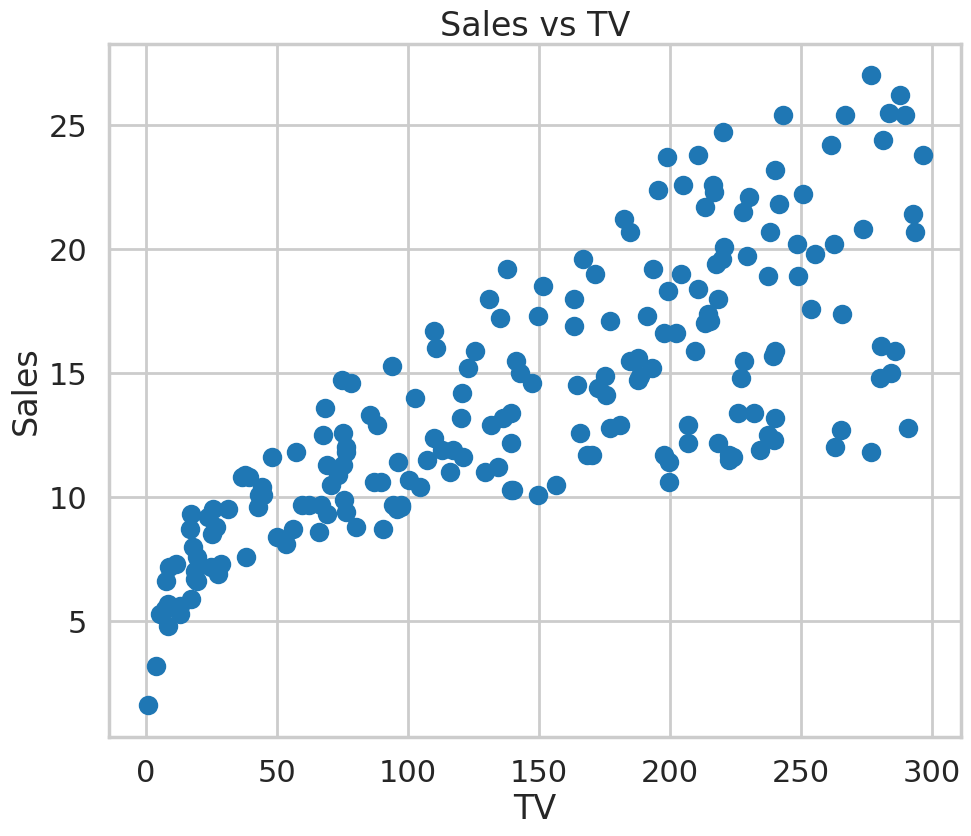

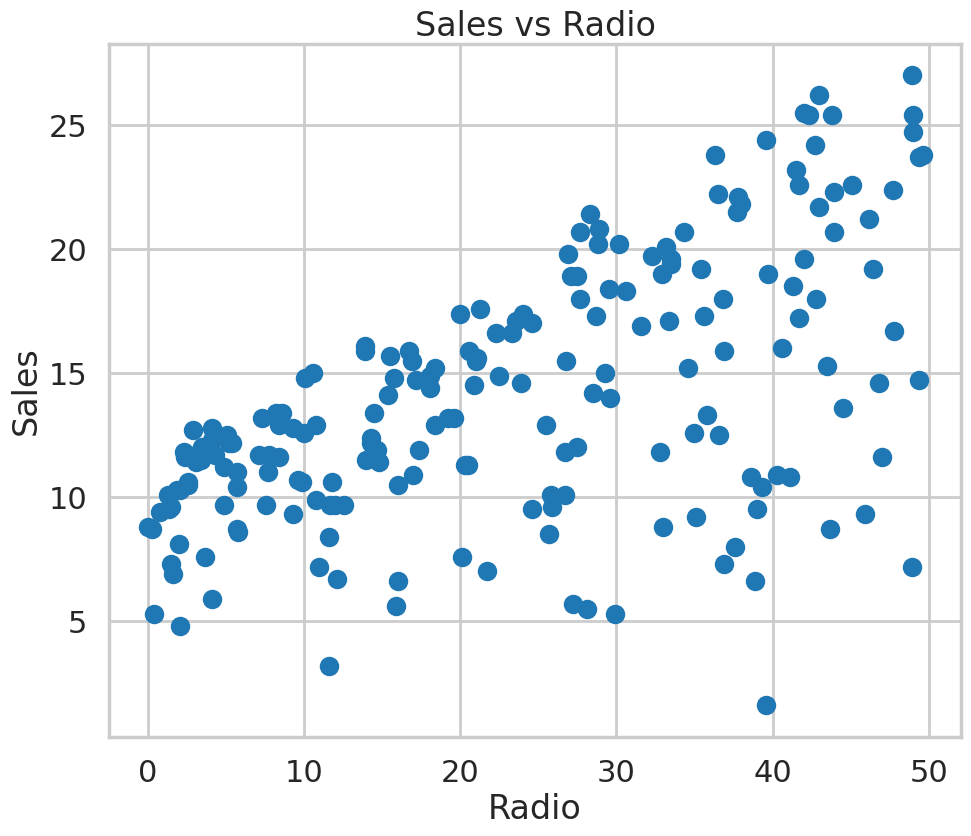

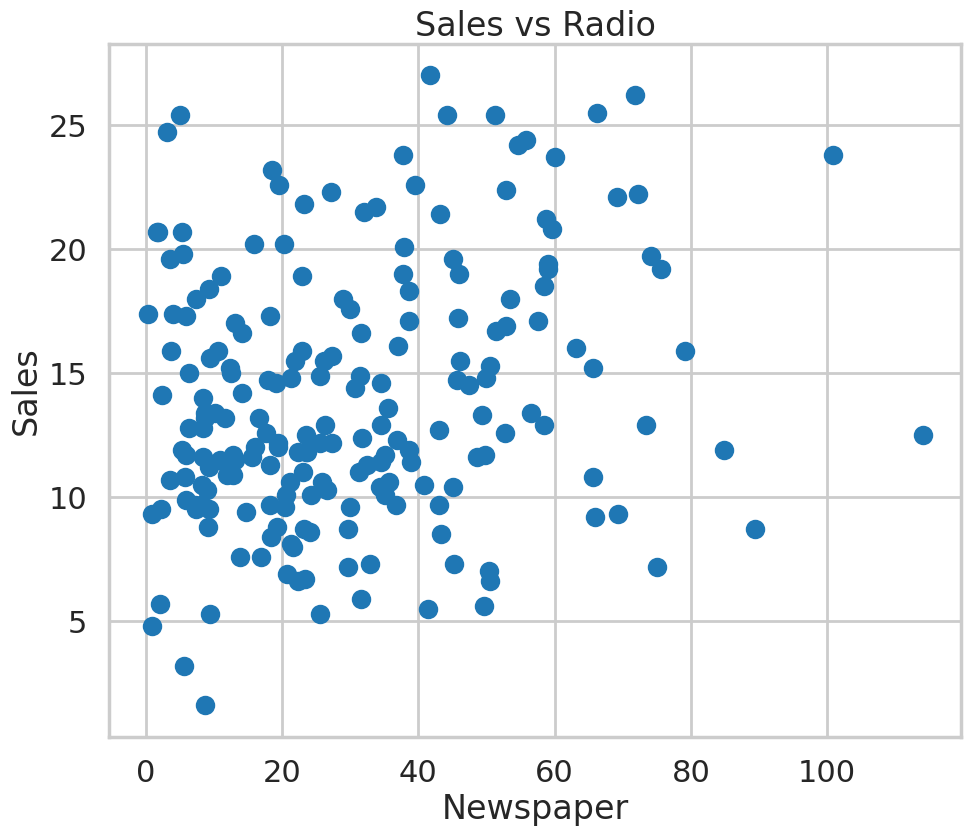

In [10]:
##visualize
f, ax =plt.subplots(figsize=(11,9))
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV')

f, ax =plt.subplots(figsize=(11,9))
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Sales vs Radio')

f, ax =plt.subplots(figsize=(11,9))
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Sales vs Radio')



Prep the data for modeling

In [20]:
#sperate the target from the predictor
x=df.drop('Sales', axis=1)
y=df['Sales']

print(f"== x ( predictors)==\nSize : {x.shape}\n{x.head()}\n Data Type:{type(x.head())}" )
print(f"\n==y ( target ) == \ nSize : {y.shape}\n {y.head()} \n {type(y.head())}")

== x ( predictors)==
Size : (200, 4)
   Unnamed: 0     TV  Radio  Newspaper
0           1  230.1   37.8       69.2
1           2   44.5   39.3       45.1
2           3   17.2   45.9       69.3
3           4  151.5   41.3       58.5
4           5  180.8   10.8       58.4
 Data Type:<class 'pandas.core.frame.DataFrame'>

==y ( target ) == \ nSize : (200,)
 0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64 
 <class 'pandas.core.series.Series'>


In [18]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=42)
print("x_train size: ",x_train.shape)
print("y_train size: ",y_train.shape)
print("x_test size: ",x_test.shape)
print("x_test size: ",x_test.shape)

x_train size:  (150, 4)
y_train size:  (150,)
x_test size:  (50, 4)
x_test size:  (50, 4)


In [24]:
df_results = pd.DataFrame(columns = ["Predictors/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

In [32]:
#linear Regression Function

def linreg_model(xtrain, xtest):
  #instantiating linear regression classifier
  linreg = LinearRegression()
   #fit the data
  linreg.fit(xtrain, y_train)
  #Evaluate the model
  y_pred = linreg.predict(xtest)

  print("R2:", r2_score(y_pred, y_test))
  print("MAE:", mean_absolute_error(y_pred, y_test))
  print("MSE:", mean_squared_error(y_pred, y_test))
  print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

  f, ax = plt.subplots(figsize=(11,9))
  plt.scatter(y_pred, y_test)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Actual vs. Predicted")

  return {"R2: ": r2_score(y_pred, y_test)*100,
          "MAE: ": mean_absolute_error(y_pred, y_test),
          "MSE: ": mean_squared_error(y_pred, y_test),
          "RMSE: ": np.sqrt(mean_squared_error(y_pred, y_test))
          }

R2: 0.8832447395846407
MAE: 1.408274391966874
MSE: 2.9041392726757196
RMSE: 1.7041535355347885
Cross-Val Results [0.87074153 0.84929412 0.92990198 0.88982108 0.93148951 0.93118906
 0.75841122 0.91195192 0.83320962 0.91898728]
Cross-Val Mean 0.8824997330280173


<ipython-input-33-eebbd79a2863>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(linreg_all_results , ignore_index = True)


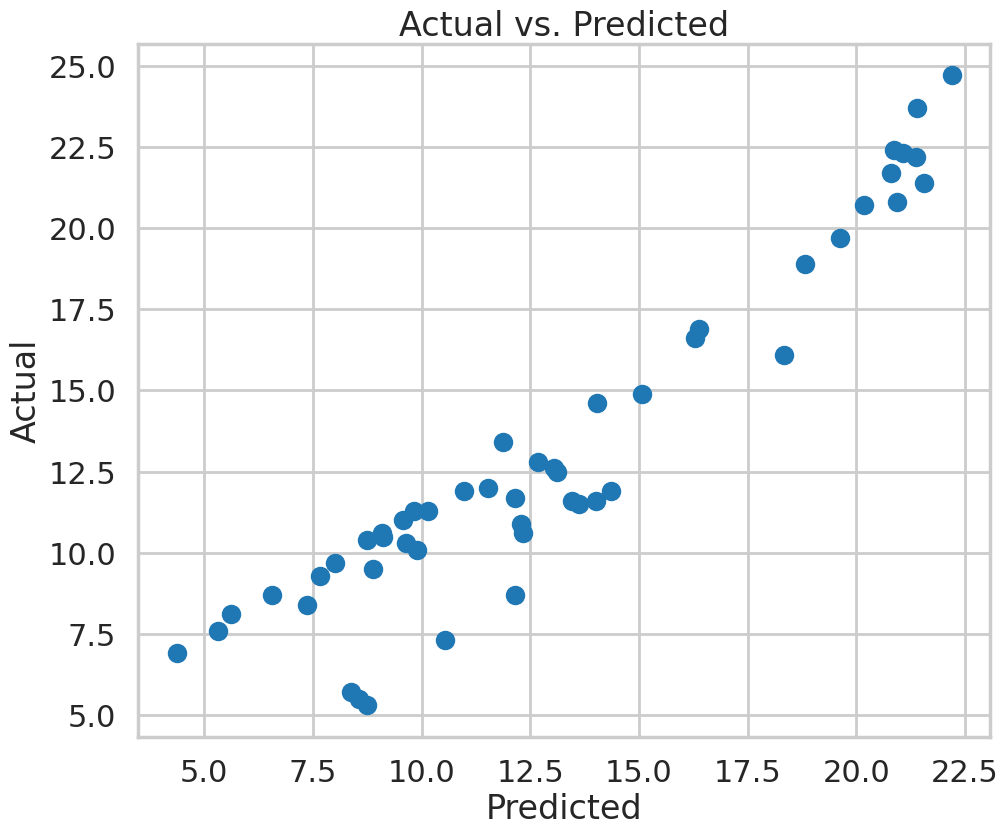

In [33]:
# predict and get result

linreg_all_results = linreg_model(x_train,x_test)
#cross validation
cv_score = cross_val_score(LinearRegression(),x,y,cv=10)
print("Cross-Val Results", cv_score)
print("Cross-Val Mean", cv_score.mean())

linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() *100})

df_results = df_results.append(linreg_all_results , ignore_index = True)